In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
# model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 4

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,114
Trainable params: 1,114
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/8 [==>...........................] - ETA: 4s - loss: 1.4639 - accuracy: 0.2891
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 1s 58ms/step - loss: 1.3959 - accuracy: 0.3323 - val_loss: 1.2666 - val_accuracy: 0.5770
Epoch 2/1000
1/8 [==>...........................] - ETA: 0s - loss: 1.3445 - accuracy: 0.3672
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 0s 10ms/step - loss: 1.2598 - accuracy: 0.4677 - val_loss: 1.1593 - val_accuracy: 0.5770
Epoch 3/1000
1/8 [==>...........................] - ETA: 0s - loss: 1.2084 - accuracy: 0.5234
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 0s 10ms/step - loss: 1.1530 - accuracy: 0.5717 - val_loss: 1.0626 - val_accuracy: 0.5770
Epoch 4/1000
1/8 [==>...........................] - ETA: 0s - loss: 1.1374 - accuracy: 0.5547
Epoch 4: 

8/8 [==============================] - 0s 9ms/step - loss: 0.1043 - accuracy: 0.9717 - val_loss: 0.0182 - val_accuracy: 1.0000
Epoch 29/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0819 - accuracy: 0.9844
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 0s 9ms/step - loss: 0.1016 - accuracy: 0.9737 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 30/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0942 - accuracy: 0.9922
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 0s 10ms/step - loss: 0.0937 - accuracy: 0.9798 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 31/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.1105 - accuracy: 0.9688
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 0s 11ms/step - loss: 0.0881 - accuracy: 0.9808 - val_loss: 0

Epoch 56/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0782 - accuracy: 0.9766
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 0s 8ms/step - loss: 0.0490 - accuracy: 0.9879 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 57/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0480 - accuracy: 0.9844
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 0s 9ms/step - loss: 0.0545 - accuracy: 0.9889 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 58/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0734 - accuracy: 0.9766
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 0s 9ms/step - loss: 0.0424 - accuracy: 0.9869 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 59/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0364 - accuracy: 0.9922
Epoch

1/8 [==>...........................] - ETA: 0s - loss: 0.0262 - accuracy: 0.9922
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 0s 11ms/step - loss: 0.0341 - accuracy: 0.9909 - val_loss: 5.0670e-04 - val_accuracy: 1.0000
Epoch 84/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0156 - accuracy: 1.0000
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 0s 11ms/step - loss: 0.0356 - accuracy: 0.9919 - val_loss: 4.9463e-04 - val_accuracy: 1.0000
Epoch 85/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0120 - accuracy: 1.0000
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 0s 11ms/step - loss: 0.0296 - accuracy: 0.9929 - val_loss: 4.7980e-04 - val_accuracy: 1.0000
Epoch 86/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0160 - accuracy: 1.0000
Epoc

Epoch 110/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0695 - accuracy: 0.9766
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 0s 9ms/step - loss: 0.0226 - accuracy: 0.9939 - val_loss: 2.3185e-04 - val_accuracy: 1.0000
Epoch 111/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0155 - accuracy: 1.0000
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 0s 9ms/step - loss: 0.0301 - accuracy: 0.9899 - val_loss: 2.1320e-04 - val_accuracy: 1.0000
Epoch 112/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0521 - accuracy: 0.9609
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 0s 9ms/step - loss: 0.0233 - accuracy: 0.9899 - val_loss: 2.1243e-04 - val_accuracy: 1.0000
Epoch 113/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0094 - acc

Epoch 137/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0226 - accuracy: 1.0000
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 0s 9ms/step - loss: 0.0234 - accuracy: 0.9949 - val_loss: 1.5338e-04 - val_accuracy: 1.0000
Epoch 138/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0324 - accuracy: 0.9922
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 0s 9ms/step - loss: 0.0233 - accuracy: 0.9929 - val_loss: 1.5551e-04 - val_accuracy: 1.0000
Epoch 139/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0323 - accuracy: 0.9766
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 0s 10ms/step - loss: 0.0339 - accuracy: 0.9879 - val_loss: 1.4516e-04 - val_accuracy: 1.0000
Epoch 140/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0241 - ac

Epoch 164/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0207 - accuracy: 0.9922
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 0s 10ms/step - loss: 0.0206 - accuracy: 0.9939 - val_loss: 7.7289e-05 - val_accuracy: 1.0000
Epoch 165/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0269 - accuracy: 0.9922
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 0s 10ms/step - loss: 0.0207 - accuracy: 0.9939 - val_loss: 7.5046e-05 - val_accuracy: 1.0000
Epoch 166/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0057 - accuracy: 1.0000
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 0s 10ms/step - loss: 0.0215 - accuracy: 0.9929 - val_loss: 7.0997e-05 - val_accuracy: 1.0000
Epoch 167/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0385 - 

Epoch 191/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0405 - accuracy: 0.9844
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 0s 10ms/step - loss: 0.0338 - accuracy: 0.9859 - val_loss: 7.9684e-05 - val_accuracy: 1.0000
Epoch 192/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0159 - accuracy: 1.0000
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 0s 10ms/step - loss: 0.0191 - accuracy: 0.9990 - val_loss: 7.6627e-05 - val_accuracy: 1.0000
Epoch 193/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0160 - accuracy: 0.9922
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.keras
8/8 [==============================] - 0s 10ms/step - loss: 0.0186 - accuracy: 0.9929 - val_loss: 6.9874e-05 - val_accuracy: 1.0000
Epoch 194/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0069 - 

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 2ms/step - loss: 6.0466e-05 - accuracy: 1.0000


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 97ms/step
[2.1488792e-14 1.4034921e-13 1.5996264e-12 1.0000000e+00]
3


# Confusion matrix

11/11 [==============================] - 0s 756us/step


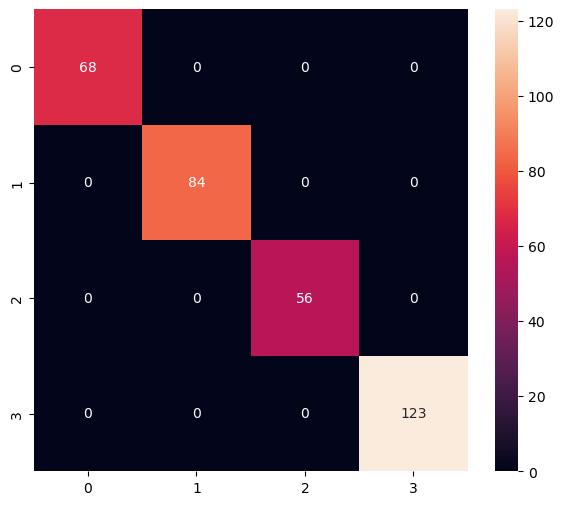

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00        56
           3       1.00      1.00      1.00       123

    accuracy                           1.00       331
   macro avg       1.00      1.00      1.00       331
weighted avg       1.00      1.00      1.00       331



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)


In [17]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\admin\AppData\Local\Temp\tmpu7f4zsr3\assets


INFO:tensorflow:Assets written to: C:\Users\admin\AppData\Local\Temp\tmpu7f4zsr3\assets


6544

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.1488796e-14 1.4034895e-13 1.5996293e-12 1.0000000e+00]
3
